# Imports

In [129]:
%matplotlib inline
import pandas as pd
pd.options.mode.chained_assignment = None
from math import*
import numpy as np
import os
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Leitura da planilha e "limpeza"

In [3]:
df = pd.read_excel('dados.xlsx')
df.head(5)

,ID,Situação de rua,Onde dormiu ontem,Tempo de permanência,Sexo,Identifica com o sexo nasceu,Idade,Faixa de idade,Classificação de idade,Cor_Raça_Etnia,...,Tempo na situação,Tipo de ponto,Presença_Moradia_Improvisada,Criança_acomp_Adulto,Criança_Sozinha,Latitude,Longitude,Data,Subprefeitura,Distrito
0,1,Rua,Não se aplica,Não se aplica,Feminino,Não respondeu,Não respondeu,Sem informação,Sem informação,Sem identificação,...,NR/NS,Praça,Não,Não,Não,-23.496278,-46.391831,2021-10-25,Itaim Paulista,Itaim Paulista
1,2,Acolhido,Rua,Não se aplica,Masculino,Homem Cisgênero,38,31 a 49,Adulto,Parda,...,Mais de 10 anos,Não se aplica,Não se aplica,Não se aplica,Não se aplica,-23.522517,-46.522712,2021-10-25,Penha,Penha
2,3,Rua,Não se aplica,Não se aplica,Feminino,Mulher Cisgênero,27,18 a 30,Juventude,Parda,...,Mais de 2 anos até 5 anos,Praça,Sim,Não,Não,-23.523293,-46.654984,2021-11-03,Sé,Santa Cecília
3,4,Rua,Não se aplica,Não se aplica,Masculino,Homem Cisgênero,15,12 a 17,Adolescente,Branca,...,Mais de 5 anos até 10 anos,Calçada,Sim,Não,Não,-23.743078,-46.692948,2021-10-27,Capela do Socorro,Grajaú
4,5,Rua,Não se aplica,Não se aplica,Feminino,Mulher Cisgênero,Não respondeu,Sem informação,Sem informação,Sem identificação,...,NR/NS,Canteiro central,Sim,Não,Não,-23.525142,-46.625523,2021-11-09,Mooca,Pari


In [4]:
df.columns

Index(['ID', 'Situação de rua', 'Onde dormiu ontem', 'Tempo de permanência',
       'Sexo', 'Identifica com o sexo nasceu', 'Idade', 'Faixa de idade',
       'Classificação de idade', 'Cor_Raça_Etnia', 'Parentes no CA',
       'Tempo na situação', 'Tipo de ponto', 'Presença_Moradia_Improvisada',
       'Criança_acomp_Adulto', 'Criança_Sozinha', 'Latitude', 'Longitude',
       'Data', 'Subprefeitura', 'Distrito'],
      dtype='object')

In [38]:
df.Subprefeitura = df.Subprefeitura.replace("M'boi Mirim", "M'Boi Mirim")

# Analise Exploratória sobre Subprefeituras

In [130]:
print(pd.Series(df.Subprefeitura.value_counts()))

Subprefeitura
Sé                           12851
Mooca                         5811
Vila Maria-Vila Guilherme     1238
Santana-Tucuruvi              1232
Santo Amaro                   1090
Lapa                          1062
Vila Mariana                   972
Penha                          583
Itaquera                       549
Pinheiros                      545
Ipiranga                       544
Casa Verde-Cachoeirinha        539
São Miguel                     417
Aricanduva-Formosa-Carrão      407
Guaianases                     391
Campo Limpo                    348
Ermelino Matarazzo             346
Jabaquara                      345
Capela do Socorro              340
Vila Prudente                  303
Jaçanã-Tremembé                297
São Mateus                     288
Butantã                        263
Cidade Ademar                  193
Itaim Paulista                 186
Freguesia-Brasilândia          165
M'Boi Mirim                    143
Cidade Tiradentes              134
Perus 

In [131]:
sub_x_situacao = pd.crosstab(df['Situação de rua'],df.Subprefeitura, normalize='columns')


In [155]:
acolhidos = []
rua = []

for i in sub_x_situacao:
    acolhidos.append(round(sub_x_situacao[i][0],2)*100)
    rua.append(round(sub_x_situacao[i][1],2)*100)


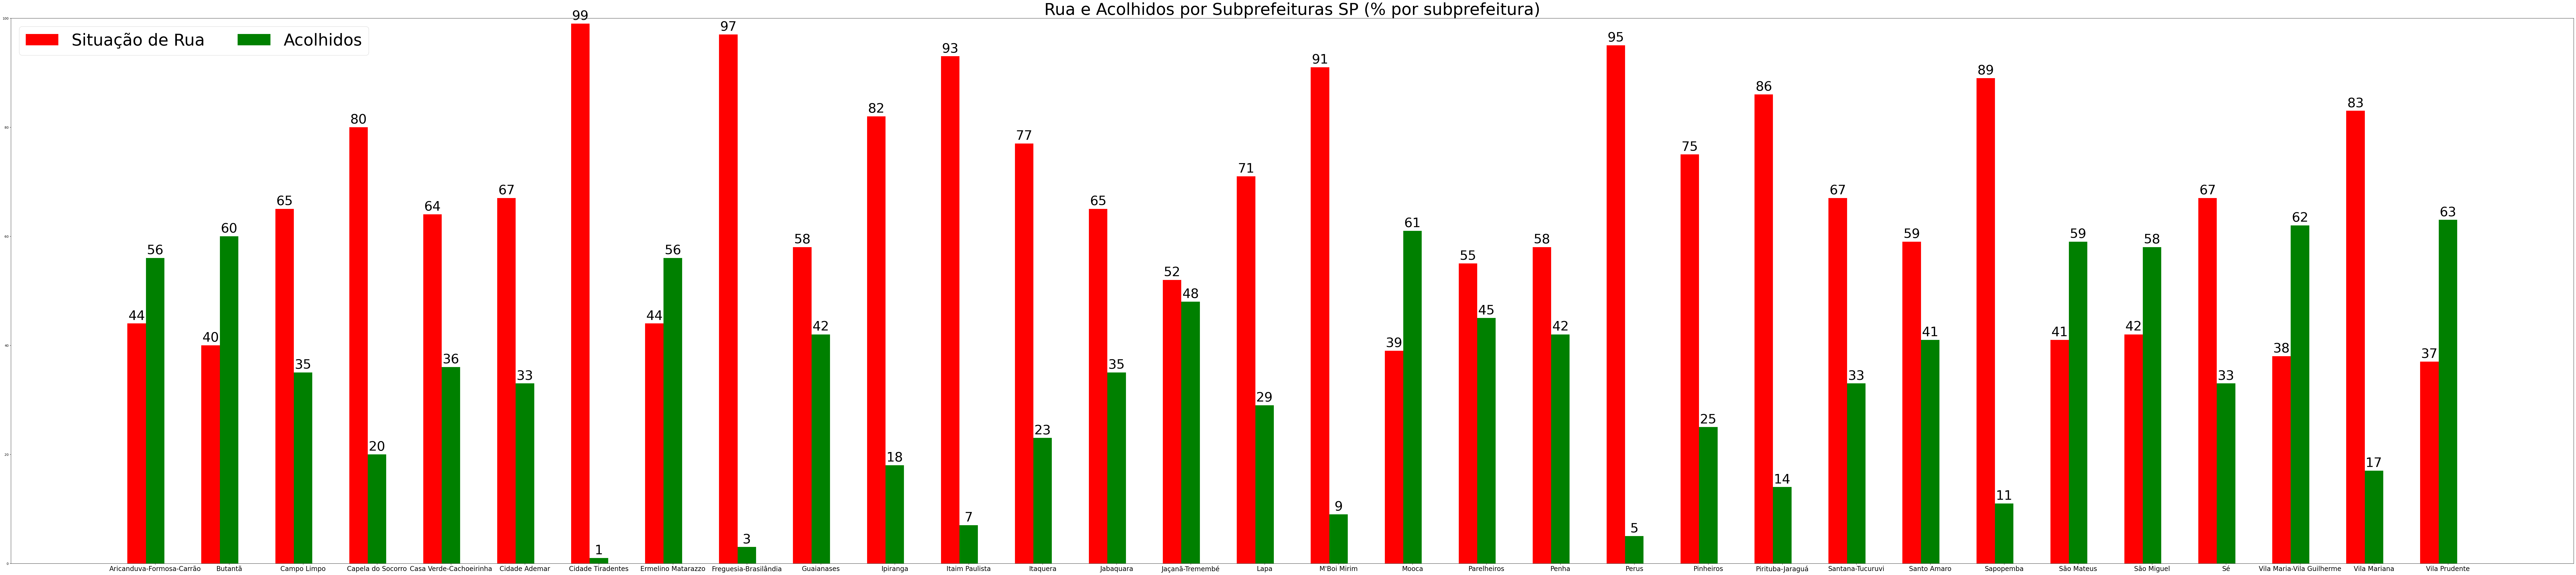

In [157]:
subprefeituras = list(sub_x_situacao)
situacao = {
    'Situação de Rua': rua,
    'Acolhidos': acolhidos
}

x = np.arange(len(subprefeituras))  # the label locations
width = 0.25 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(1,1,figsize=(140,30))
c = 'red'
for attribute, measurement in situacao.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=c)
    ax.bar_label(rects, padding=3, fontsize="40")
    multiplier += 1
    c = 'green'


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Rua e Acolhidos por Subprefeituras SP (% por subprefeitura)', fontsize="50")
ax.set_xticks(x + width, subprefeituras, fontsize="20")
ax.legend(loc='upper left', ncols=2, fontsize="50")
ax.set_ylim(0, 100)

plt.show()